The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Iniciando lector de camara
OpenCV version: major: 4, minor: 2, subminor: 0
Resolución del video: 848x480p
Cuadros por segundo: 29.97002997002997


Image(value=b'', layout="Layout(height='480', width='848')")

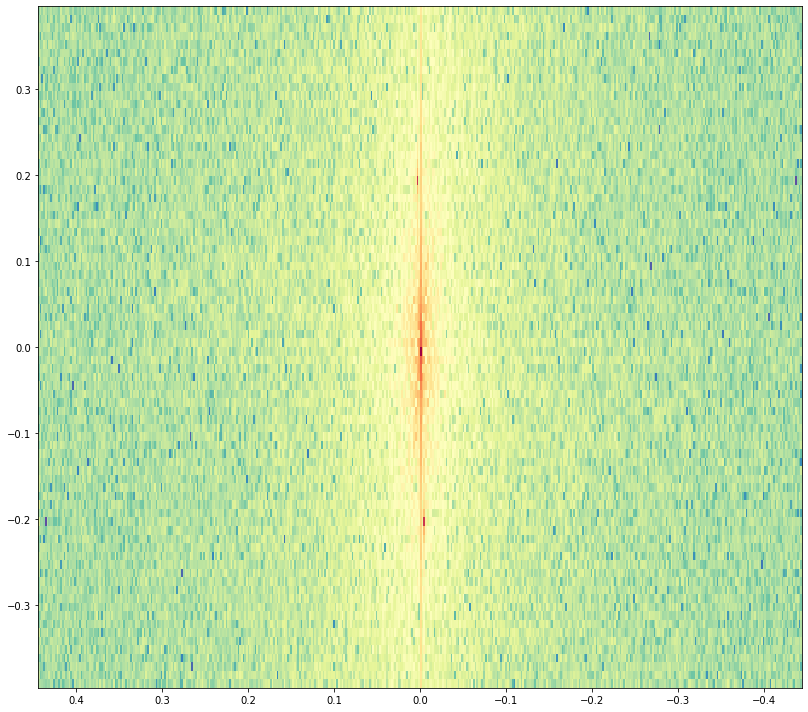

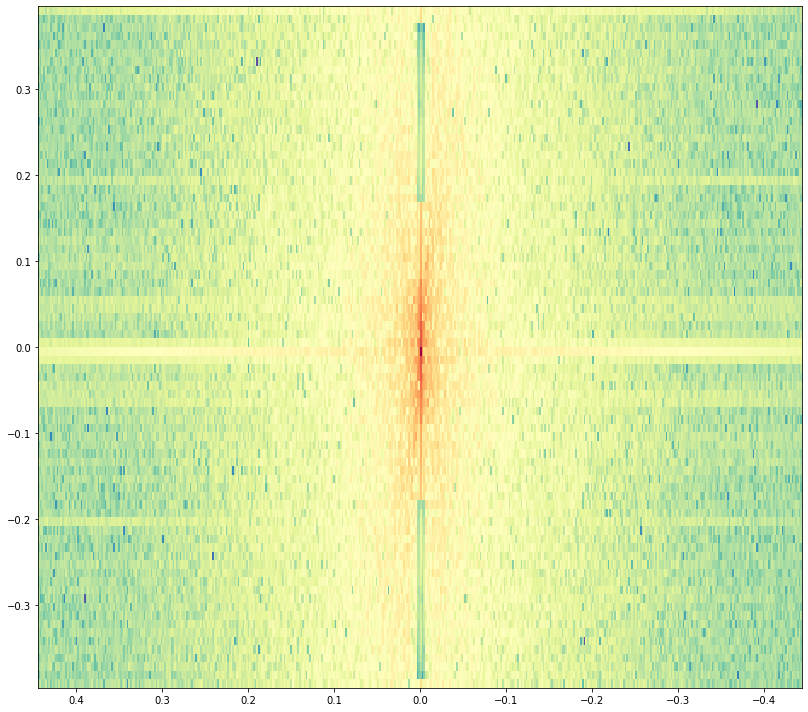

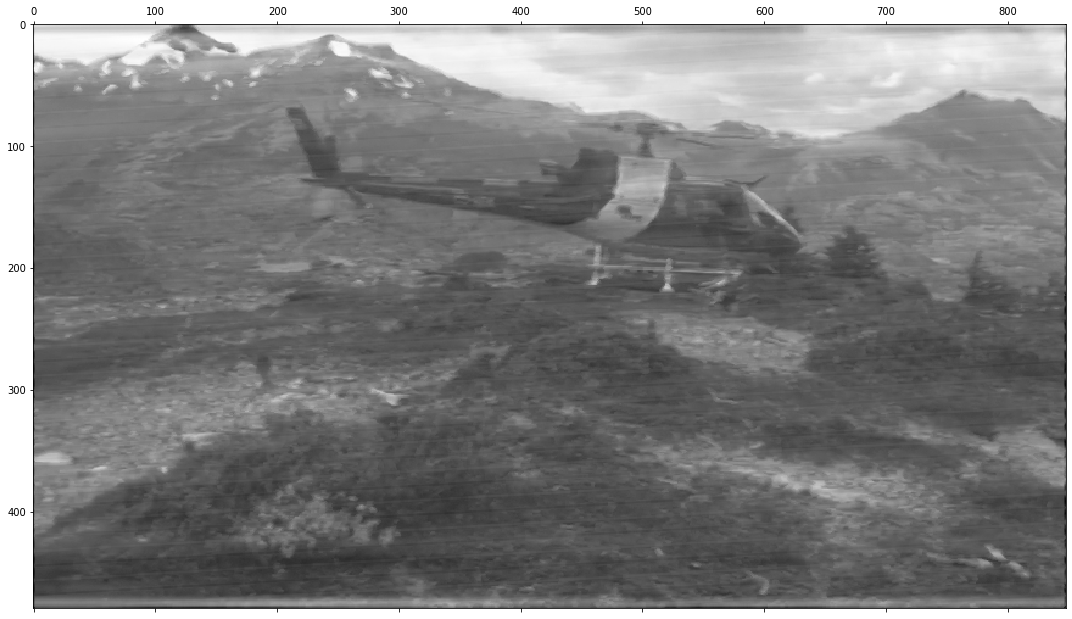

In [4]:
%load_ext autoreload
%autoreload 2

import ipywidgets as widgets
from camera import CameraReader, display_frame
from funciones import eliminar_ruido, transmisor, receptor
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import numpy as np


cam = CameraReader()
vid_height, vid_width = cam.get_resolution()
print("Resolución del video: {0}x{1}p".format(vid_width, vid_height))
print("Cuadros por segundo: {0}".format(cam.get_fps()))

out = widgets.Image(layout=widgets.Layout(width=str(vid_width), 
                                          height=str(vid_height)))
display(out)

#PARA PROBAR DIFERENTES FRAMES CAMBIAR EL VALOR DE M
n=1;
m=100;
for frame in cam:
    
    # Implemente esta función en proyecto.py
    frame_limpio = eliminar_ruido(frame,n,m)
    frame_sucio=frame #mientras
    
    # Implemente esta función en proyecto.py
    frame_comprimido = transmisor(frame_limpio)
    
    # Mida el peso en bits de frame_comprimido
    
    # Implemente esta función en proyecto.py
    frame = receptor(frame_comprimido)
    
    #display_frame(out, frame)
    
    if n==m:
        fig, ax = plt.subplots(1, 1, figsize=(15, 10), tight_layout=True);
        # Espectro
        freq_x = fftpack.fftshift(fftpack.fftfreq(n=frame.shape[1]))
        freq_y = fftpack.fftshift(fftpack.fftfreq(n=frame.shape[0]))
        ax.imshow(np.log(1+np.abs(fftpack.fftshift(fftpack.fft2(frame_sucio))))[200:-200, 200:-200], cmap=plt.cm.Spectral_r,
                 extent=(freq_x[800], freq_x[-800], freq_y[50], freq_y[-50]))        # Reconstrucción
        fig, ax2 = plt.subplots(1, 1, figsize=(15, 10), tight_layout=True);
        ax2.imshow(np.log(1+np.abs(fftpack.fftshift(fftpack.fft2(frame))))[200:-200, 200:-200], cmap=plt.cm.Spectral_r,
                   extent=(freq_x[800], freq_x[-800], freq_y[50], freq_y[-50])) 
        fig, ax3 = plt.subplots(1, 1, figsize=(15, 10), tight_layout=True);
        ax3.matshow(frame[:,:], cmap=plt.cm.Greys_r)
        break
    n=n+1
        
      
   